In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
from google.colab import drive
drive.mount('/content/drive')






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
#data = pd.read_csv('/content/drive/My Drive/data/kaggle_survey_2020_responses.csv', header =1)
data = pd.read_csv('/content/drive/My Drive/data/kaggle_survey_2020_responses.csv')
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


###데이터 전처리

- 교육상태와 관련이 있는 column들을 고릅니다.

- Data Science 실무 경력과 관련된 column들을 고릅니다.

# Kaggle survay - https://www.kaggle.com/competitions/kaggle-survey-2020

1.What is your age (# years)?

2.What is your gender?

3.In which country do you currently reside?

4.What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

5.Select the title most similar to your current role (or most recent title if retired):

6.For how many years have you been writing code and/or programming?
7.What programming languages do you use on a regular basis? (Select all that apply)

8.What programming language would you recommend an aspiring data scientist to learn first?

9.Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply)

10.Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply)

11.What type of computing platform do you use most often for your data science projects?

12.Which types of specialized hardware do you use on a regular basis?  (Select all that apply)

13.Approximately how many times have you used a TPU (tensor processing unit)?
14.What data visualization libraries or tools do you use on a regular basis? (Select all that apply)

15.For how many years have you used machine learning methods?

16.Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)

17.Which of the following ML algorithms do you use on a regular basis? (Select all that apply):

18.Which categories of computer vision methods do you use on a regular basis? (Select all that apply)

19.Which of the following natural language processing (NLP) methods do you use on a regular basis? (Select all that apply)

20.What is the size of the company where you are employed?

21.Approximately how many individuals are responsible for data science workloads at your place of business?

22.Does your current employer incorporate machine learning methods into their business?

23. Select any activities that make up an important part of your role at work: (Select all that apply)


In [55]:
edu_columns = ["Q4","Q6","Q15"]


ds_columns = ["Q5","Q20","Q22"]

#y =["Q24"]

#edit_data = data[edu_columns + ds_columns + y]
edit_data = data[edu_columns + ds_columns]
edit_data

,Q4,Q6,Q15,Q5,Q20,Q22
0,What is the highest level of formal education ...,For how many years have you been writing code ...,For how many years have you used machine learn...,Select the title most similar to your current ...,What is the size of the company where you are ...,Does your current employer incorporate machine...
1,Doctoral degree,5-10 years,1-2 years,Student,NaN,NaN
2,Master’s degree,5-10 years,1-2 years,Data Engineer,"10,000 or more employees","We have well established ML methods (i.e., mod..."
3,Bachelor’s degree,10-20 years,I do not use machine learning methods,Software Engineer,"1000-9,999 employees",No (we do not use ML methods)
4,Master’s degree,5-10 years,3-4 years,Data Scientist,250-999 employees,"We have well established ML methods (i.e., mod..."
...,...,...,...,...,...,...
20032,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN
20033,Master’s degree,20+ years,1-2 years,Currently not employed,NaN,NaN
20034,Master’s degree,< 1 years,I do not use machine learning methods,Research Scientist,0-49 employees,We are exploring ML methods (and may one day p...
20035,Bachelor’s degree,3-5 years,1-2 years,Software Engineer,"10,000 or more employees","We recently started using ML methods (i.e., mo..."


In [56]:
# null이 아닌 row만

edit_data[edit_data.isnull().any(axis=1)]

,Q4,Q6,Q15,Q5,Q20,Q22
1,Doctoral degree,5-10 years,1-2 years,Student,NaN,NaN
5,Master’s degree,3-5 years,NaN,Software Engineer,NaN,NaN
6,Bachelor’s degree,< 1 years,NaN,Data Analyst,NaN,NaN
7,Bachelor’s degree,3-5 years,Under 1 year,Student,NaN,NaN
8,Master’s degree,< 1 years,1-2 years,Student,NaN,NaN
...,...,...,...,...,...,...
20028,Master’s degree,3-5 years,I do not use machine learning methods,Student,NaN,NaN
20029,Master’s degree,< 1 years,I do not use machine learning methods,Data Analyst,0-49 employees,NaN
20031,Master’s degree,NaN,NaN,NaN,NaN,NaN
20032,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN


In [57]:
#결측치 제거
final_data = edit_data.dropna()
final_data

,Q4,Q6,Q15,Q5,Q20,Q22
0,What is the highest level of formal education ...,For how many years have you been writing code ...,For how many years have you used machine learn...,Select the title most similar to your current ...,What is the size of the company where you are ...,Does your current employer incorporate machine...
2,Master’s degree,5-10 years,1-2 years,Data Engineer,"10,000 or more employees","We have well established ML methods (i.e., mod..."
3,Bachelor’s degree,10-20 years,I do not use machine learning methods,Software Engineer,"1000-9,999 employees",No (we do not use ML methods)
4,Master’s degree,5-10 years,3-4 years,Data Scientist,250-999 employees,"We have well established ML methods (i.e., mod..."
9,Doctoral degree,5-10 years,2-3 years,Data Scientist,"1000-9,999 employees","We have well established ML methods (i.e., mod..."
...,...,...,...,...,...,...
20025,I prefer not to answer,1-2 years,1-2 years,Machine Learning Engineer,0-49 employees,I do not know
20030,Bachelor’s degree,10-20 years,I do not use machine learning methods,Other,250-999 employees,No (we do not use ML methods)
20034,Master’s degree,< 1 years,I do not use machine learning methods,Research Scientist,0-49 employees,We are exploring ML methods (and may one day p...
20035,Bachelor’s degree,3-5 years,1-2 years,Software Engineer,"10,000 or more employees","We recently started using ML methods (i.e., mo..."


### Q4 column

**"What is the highest level of formal education that you have attained or plan to attain with the next 2 years?"**

In [58]:
Q4 = final_data["Q4"][1:]

Q4

2               Master’s degree
3             Bachelor’s degree
4               Master’s degree
9               Doctoral degree
12              Doctoral degree
                  ...          
20025    I prefer not to answer
20030         Bachelor’s degree
20034           Master’s degree
20035         Bachelor’s degree
20036           Master’s degree
Name: Q4, Length: 10534, dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

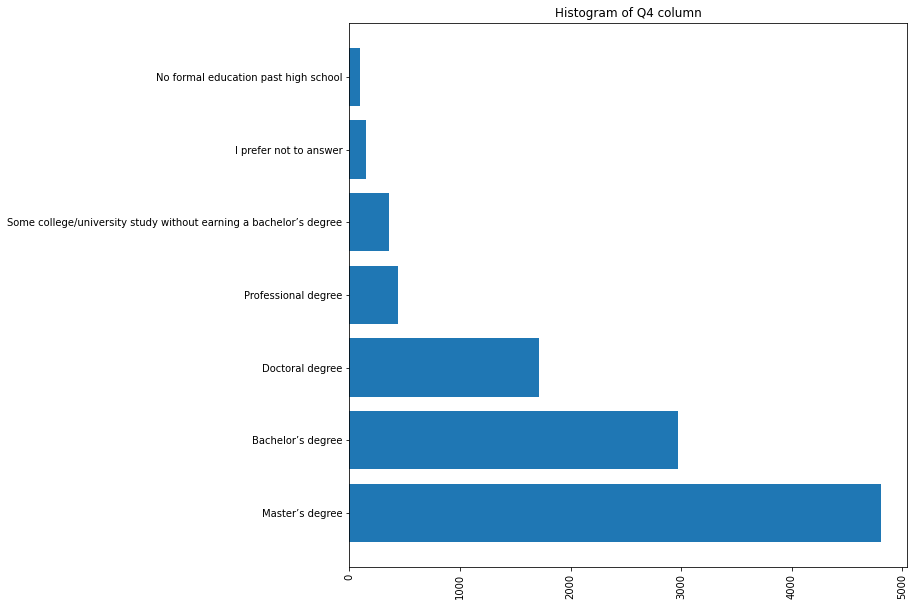

In [106]:
plt.figure(figsize=(10,10))

plt.barh(Q4.value_counts().index, Q4.value_counts().values)
plt.xticks(rotation='vertical')
plt.title("Histogram of Q4 column")

plt.show

Text(0.5, 1.0, 'pie chart for Q4 column')

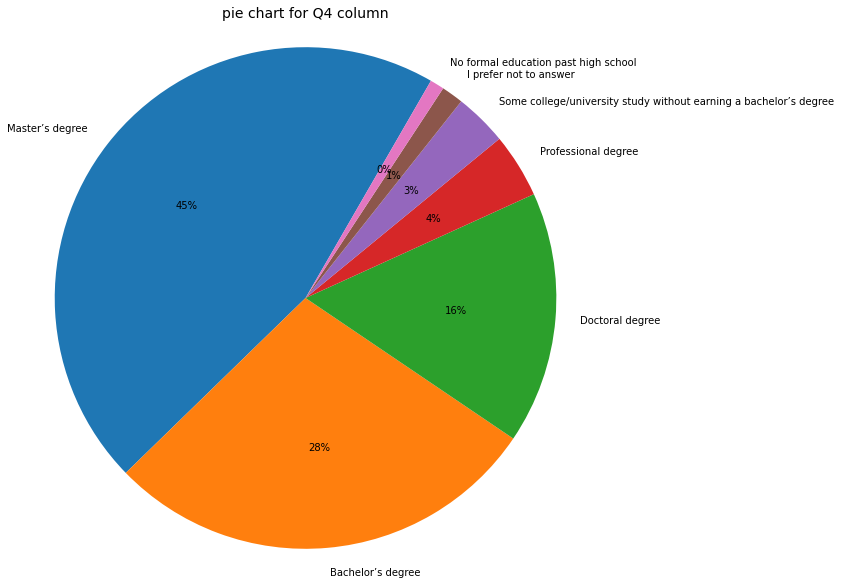

In [60]:
plt.figure(figsize=(10,10))
plt.pie(Q4.value_counts(),
        labels=Q4.value_counts().index,
        autopct='%d%%',
        startangle=60,
        textprops={'fontsize':10})

plt.axis('equal')

plt.title("pie chart for Q4 column",fontsize=14)

### Q6 column 
**For how many years have you been writing code and/or programming?**

In [61]:
Q6 = final_data["Q6"][1:]
Q6

2         5-10 years
3        10-20 years
4         5-10 years
9         5-10 years
12         1-2 years
            ...     
20025      1-2 years
20030    10-20 years
20034      < 1 years
20035      3-5 years
20036      < 1 years
Name: Q6, Length: 10534, dtype: object

In [62]:
Q6.value_counts

<bound method IndexOpsMixin.value_counts of 2         5-10 years
3        10-20 years
4         5-10 years
9         5-10 years
12         1-2 years
            ...     
20025      1-2 years
20030    10-20 years
20034      < 1 years
20035      3-5 years
20036      < 1 years
Name: Q6, Length: 10534, dtype: object>

<function matplotlib.pyplot.show(*args, **kw)>

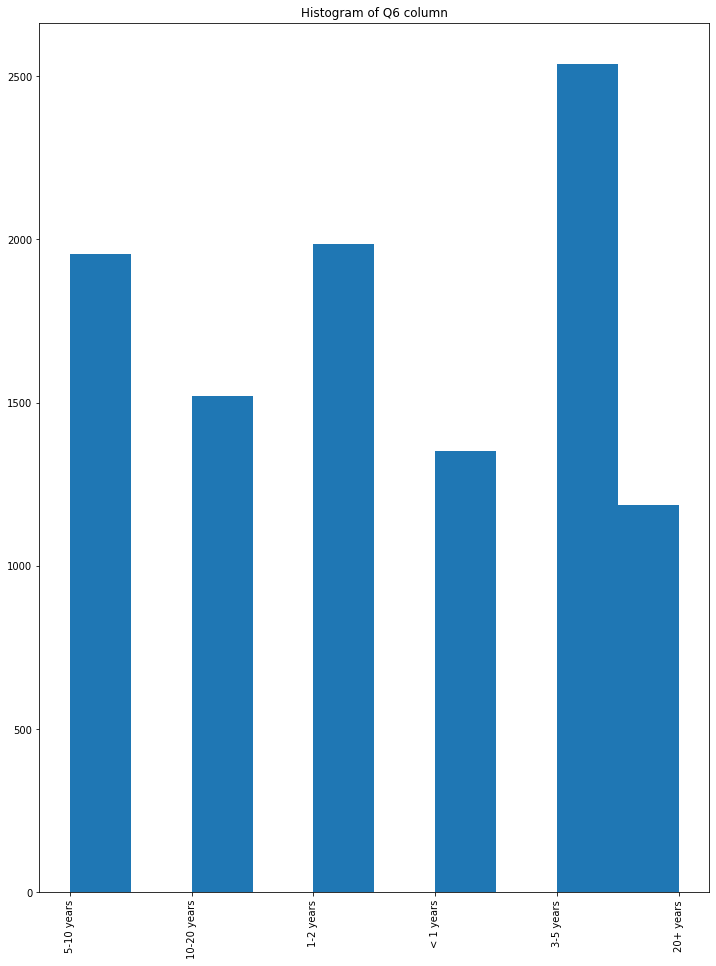

In [63]:
plt.figure(figsize=(12,16))
plt.hist(Q6)
plt.xticks(rotation='vertical')
plt.title("Histogram of Q6 column")

plt.show

Text(0.5, 1.0, 'pie chart for Q6 column')

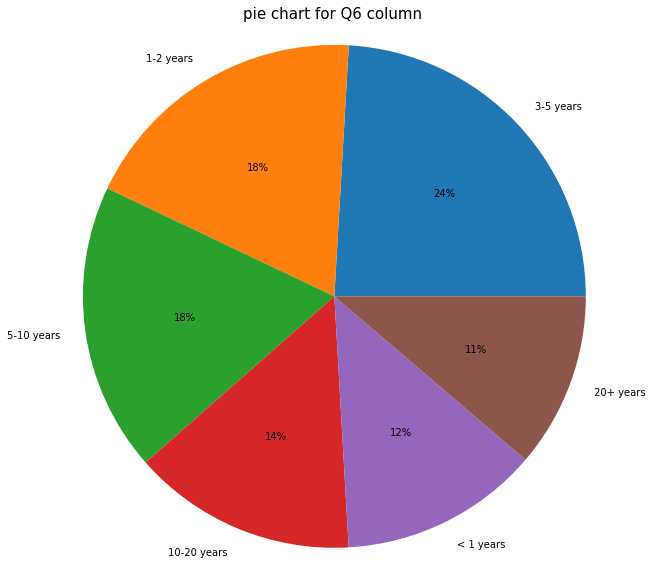

In [64]:
plt.figure(figsize=(10,10))
plt.pie(Q6.value_counts(),
        labels=Q6.value_counts().index,
        autopct='%d%%',
      
        textprops={'fontsize':10})

plt.axis('equal')

plt.title("pie chart for Q6 column",fontsize=15)

### Q15 column

**For how many years have you used machine learning methods?**

In [65]:
Q15 = final_data["Q15"][1:]
Q15

2                                    1-2 years
3        I do not use machine learning methods
4                                    3-4 years
9                                    2-3 years
12                                Under 1 year
                         ...                  
20025                                1-2 years
20030    I do not use machine learning methods
20034    I do not use machine learning methods
20035                                1-2 years
20036                             Under 1 year
Name: Q15, Length: 10534, dtype: object

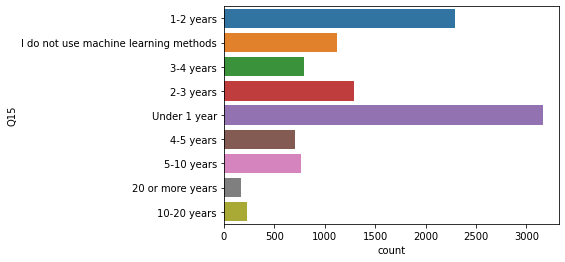

In [66]:
sns.countplot(y="Q15",data=final_data[1:])   #코딩은 많았으나 머신러닝은 많이 사용하지 않음
plt.show()

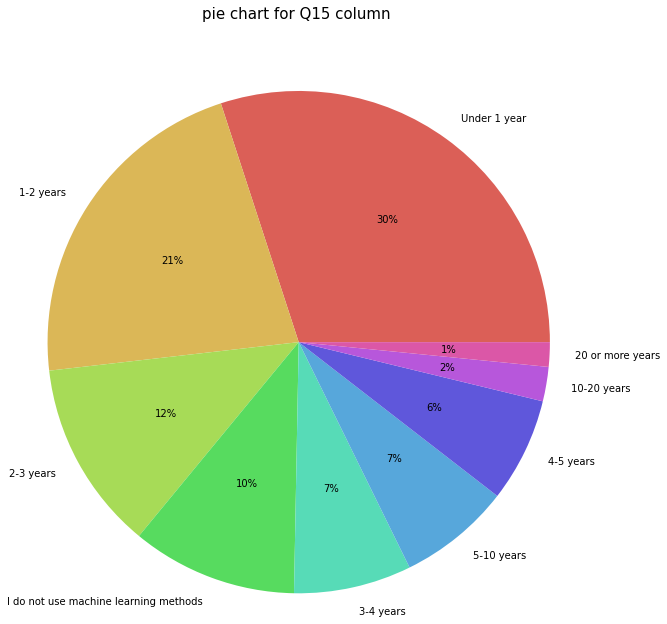

In [67]:
plt.figure(figsize=(10,10))
plt.pie(Q15.value_counts(),
        labels=Q15.value_counts().index,
        autopct='%d%%',
          colors=sns.color_palette('hls',len(Q15.value_counts().index)),
      
        textprops={'fontsize':10})

plt.axis('equal')

plt.title("pie chart for Q15 column",fontsize=15,pad=50)

plt.show()

### Q5 column

**Select the title most similar to your current role**


In [69]:
Q5 = final_data["Q5"][1:]

Q5

2                    Data Engineer
3                Software Engineer
4                   Data Scientist
9                   Data Scientist
12              Research Scientist
                   ...            
20025    Machine Learning Engineer
20030                        Other
20034           Research Scientist
20035            Software Engineer
20036    Machine Learning Engineer
Name: Q5, Length: 10534, dtype: object

In [70]:
Q5.value_counts()

Data Scientist               2429
Software Engineer            1678
Other                        1368
Data Analyst                 1216
Research Scientist           1024
Machine Learning Engineer     946
Business Analyst              605
Product/Project Manager       545
Data Engineer                 372
Statistician                  241
DBA/Database Engineer         110
Name: Q5, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

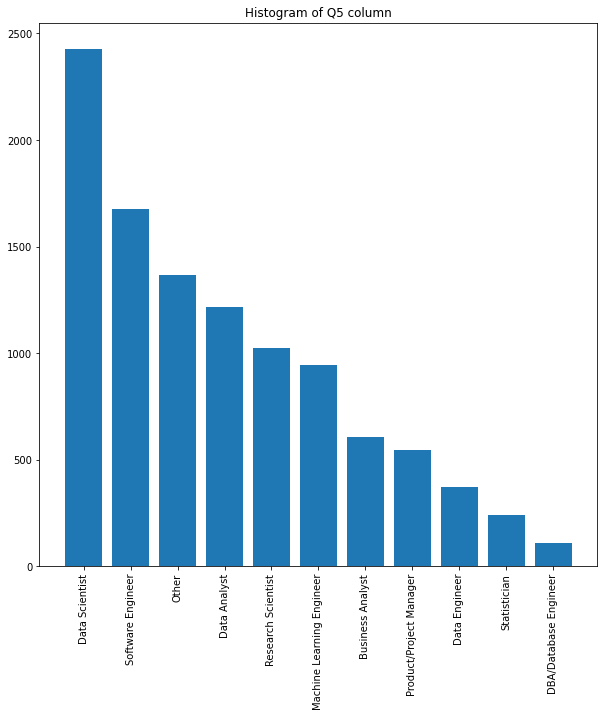

In [71]:
plt.figure(figsize=(10,10))
#plt.hist(Q5)
plt.bar(Q5.value_counts().index, Q5.value_counts().values)
plt.xticks(rotation='vertical')
plt.title("Histogram of Q5 column")

plt.show

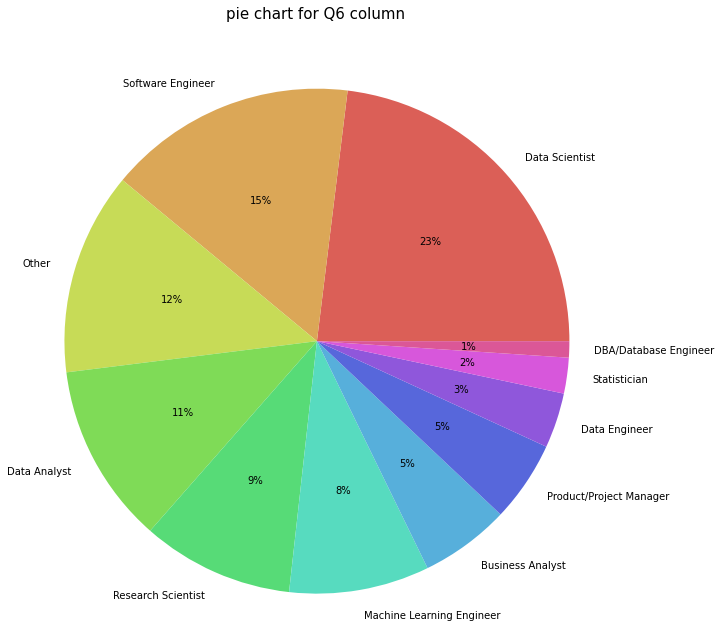

In [72]:
plt.figure(figsize=(10,10))
plt.pie(Q5.value_counts(),
        labels=Q5.value_counts().index,
        autopct='%d%%',
          colors=sns.color_palette('hls',len(Q5.value_counts().index)),
        textprops={'fontsize':10})
plt.axis('equal')
plt.title("pie chart for Q6 column",fontsize=15,pad=50)
plt.show()

### Q20 column

**What is the size of the compnay where are employed?**

In [73]:
Q20 = final_data["Q20"][1:]
Q20.value_counts()

0-49 employees              3823
10,000 or more employees    2084
1000-9,999 employees        1804
50-249 employees            1553
250-999 employees           1270
Name: Q20, dtype: int64

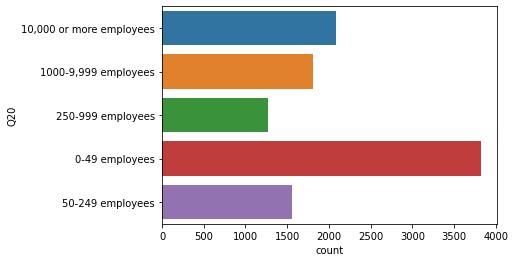

In [74]:
sns.countplot(y="Q20",data=final_data[1:])   
plt.show()

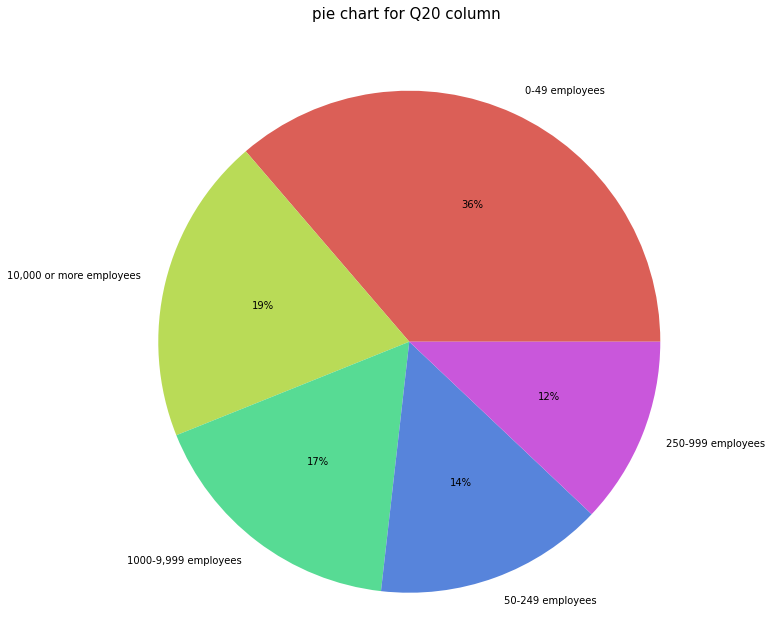

In [75]:
plt.figure(figsize=(10,10))
plt.pie(Q20.value_counts(),
        labels=Q20.value_counts().index,
        autopct='%d%%',
          colors=sns.color_palette('hls',len(Q20.value_counts().index)),
        textprops={'fontsize':10})
plt.axis('equal')
plt.title("pie chart for Q20 column",fontsize=15,pad=50)
plt.show()

### Q22 column

**Does your current employer incorporate machine learning methods into their business?**

In [76]:
Q22 = final_data["Q22"][1:]
Q22.value_counts()

We are exploring ML methods (and may one day put a model into production)                    2253
No (we do not use ML methods)                                                                2005
We have well established ML methods (i.e., models in production for more than 2 years)       1881
We recently started using ML methods (i.e., models in production for less than 2 years)      1765
I do not know                                                                                1414
We use ML methods for generating insights (but do not put working models into production)    1216
Name: Q22, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

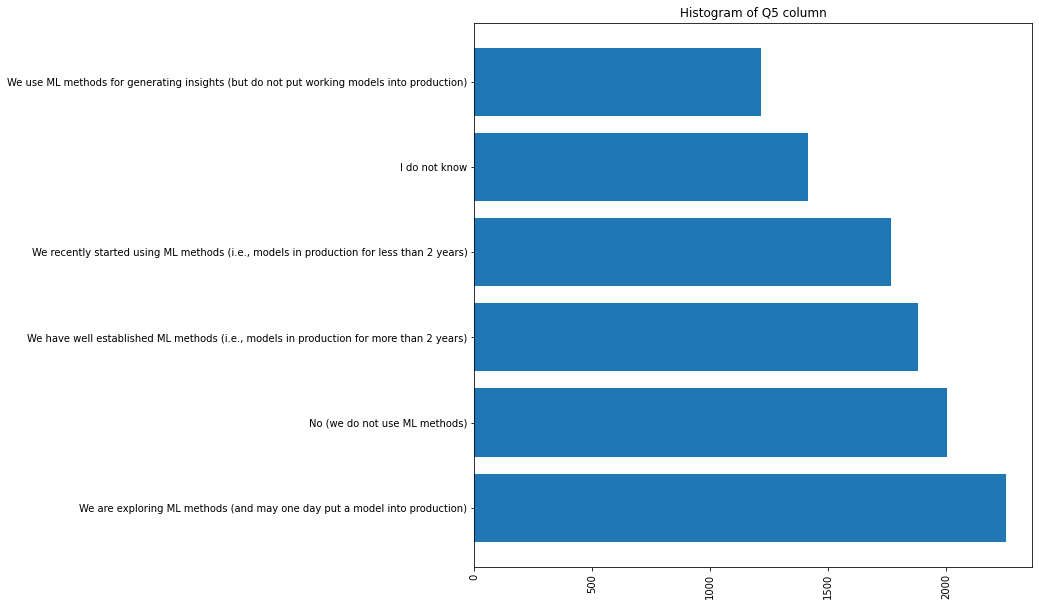

In [77]:
plt.figure(figsize=(10,10))
#plt.hist(Q5)
plt.barh(Q22.value_counts().index, Q22.value_counts().values)
plt.xticks(rotation='vertical')
plt.title("Histogram of Q5 column")

plt.show

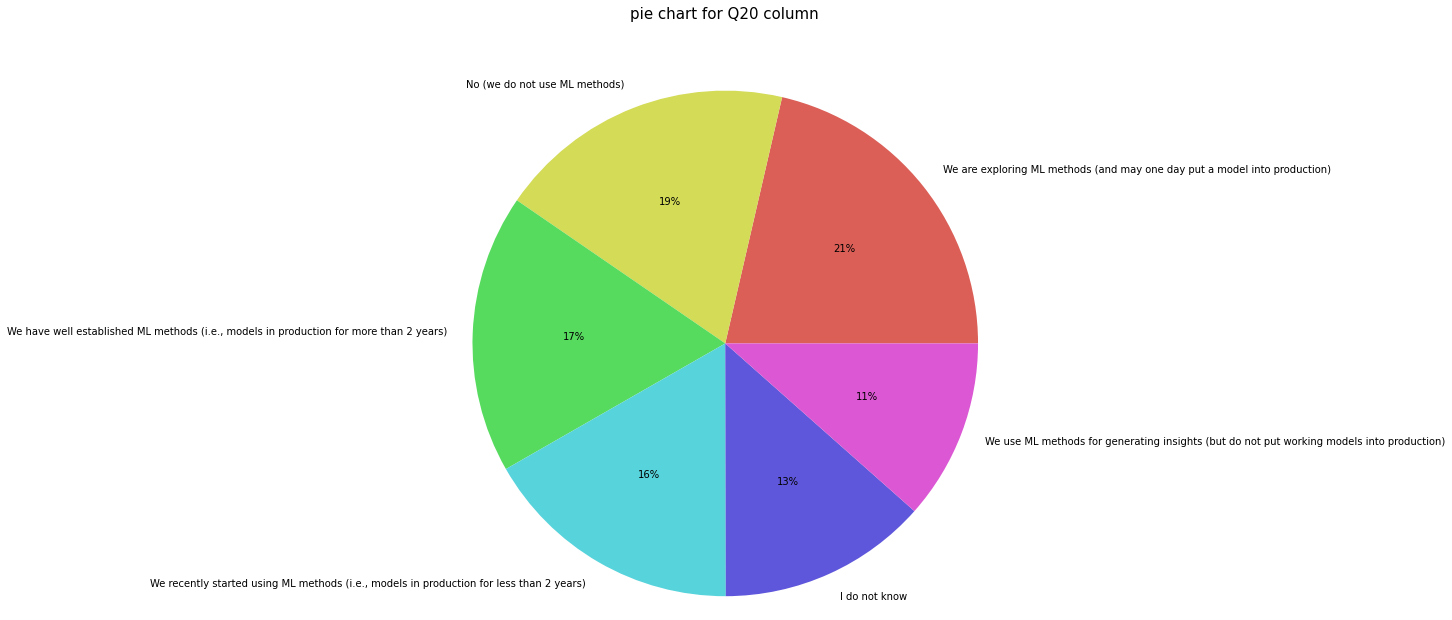

In [78]:
plt.figure(figsize=(10,10))
plt.pie(Q22.value_counts(),
        labels=Q22.value_counts().index,
        autopct='%d%%',
          colors=sns.color_palette('hls',len(Q22.value_counts().index)),
        textprops={'fontsize':10})
plt.axis('equal')
plt.title("pie chart for Q20 column",fontsize=15,pad=50)
plt.show()

### 한국으로 알아보기

**같은 방식으로 진행**

In [79]:
set(data['Q3'])

{'Argentina',
 'Australia',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Brazil',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Egypt',
 'France',
 'Germany',
 'Ghana',
 'Greece',
 'In which country do you currently reside?',
 'India',
 'Indonesia',
 'Iran, Islamic Republic of...',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kenya',
 'Malaysia',
 'Mexico',
 'Morocco',
 'Nepal',
 'Netherlands',
 'Nigeria',
 'Other',
 'Pakistan',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Republic of Korea',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Singapore',
 'South Africa',
 'South Korea',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Thailand',
 'Tunisia',
 'Turkey',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom of Great Britain and Northern Ireland',
 'United States of America',
 'Viet Nam'}

In [80]:
data["Q3"].isin(["Republic of korea", "south korea"])

0        False
1        False
2        False
3        False
4        False
         ...  
20032    False
20033    False
20034    False
20035    False
20036    False
Name: Q3, Length: 20037, dtype: bool

In [81]:
data[data["Q3"].isin(["Republic of Korea", "South Korea"])]

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
39,592,25-29,Man,South Korea,Master’s degree,Currently not employed,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
234,1439,35-39,Man,Republic of Korea,Professional degree,Data Analyst,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
286,237,40-44,Man,South Korea,Bachelor’s degree,Currently not employed,1-2 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,16200,25-29,Man,Republic of Korea,Master’s degree,Student,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,668,35-39,Man,Republic of Korea,Master’s degree,Product/Project Manager,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19763,641,18-21,Man,South Korea,Some college/university study without earning ...,Student,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
19845,201,25-29,Man,South Korea,Master’s degree,Student,1-2 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19867,708,25-29,Man,Republic of Korea,Doctoral degree,Data Scientist,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19968,416,30-34,Man,South Korea,Bachelor’s degree,Data Analyst,1-2 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
korea = data[data["Q3"].isin(["Republic of Korea", "South Korea"])]

korea.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
39,592,25-29,Man,South Korea,Master’s degree,Currently not employed,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
234,1439,35-39,Man,Republic of Korea,Professional degree,Data Analyst,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
286,237,40-44,Man,South Korea,Bachelor’s degree,Currently not employed,1-2 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,16200,25-29,Man,Republic of Korea,Master’s degree,Student,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,668,35-39,Man,Republic of Korea,Master’s degree,Product/Project Manager,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [83]:
kQ4= korea["Q4"]
kQ4.value_counts()

Master’s degree                                                      82
Bachelor’s degree                                                    68
Doctoral degree                                                      40
Some college/university study without earning a bachelor’s degree    34
Professional degree                                                  10
No formal education past high school                                  8
I prefer not to answer                                                5
Name: Q4, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

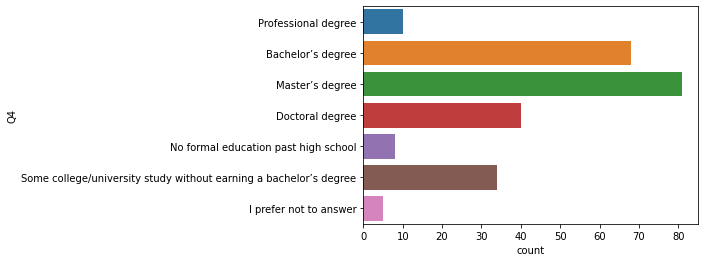

In [84]:
sns.countplot(y="Q4",data=korea[1:])
plt.show

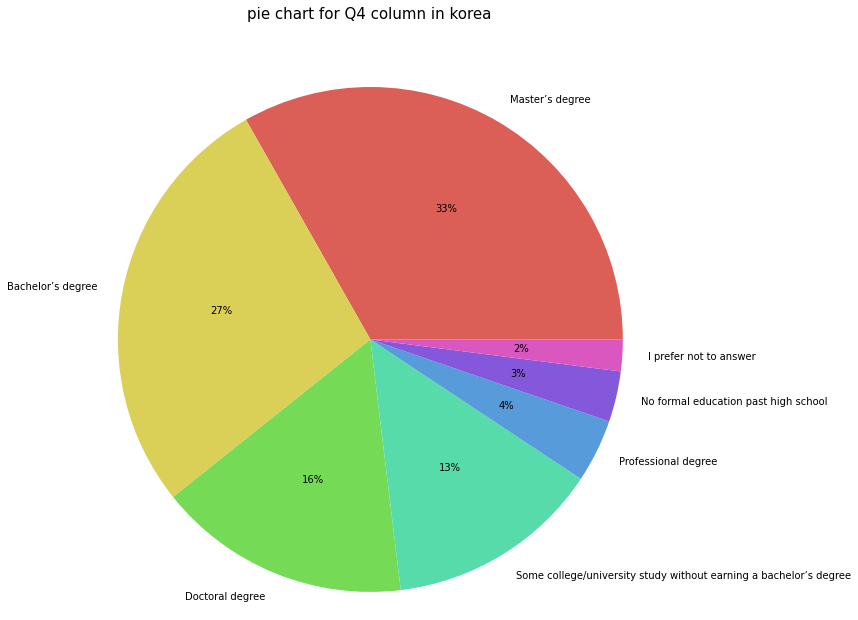

In [85]:
plt.figure(figsize=(10,10))
plt.pie(kQ4.value_counts(),
        labels=kQ4.value_counts().index,
        autopct='%d%%',
          colors=sns.color_palette('hls',len(kQ4.value_counts().index)),
      
        textprops={'fontsize':10})

plt.axis('equal')

plt.title("pie chart for Q4 column in korea",fontsize=15,pad=50)

plt.show()

In [86]:
kQ6 = korea["Q6"]
kQ6

39       5-10 years
234      5-10 years
286       1-2 years
366       3-5 years
371       < 1 years
            ...    
19763     < 1 years
19845     1-2 years
19867     3-5 years
19968     1-2 years
19990    5-10 years
Name: Q6, Length: 266, dtype: object

In [87]:
kQ6.value_counts()

1-2 years                    54
3-5 years                    51
< 1 years                    49
5-10 years                   36
10-20 years                  24
20+ years                    12
I have never written code     9
Name: Q6, dtype: int64

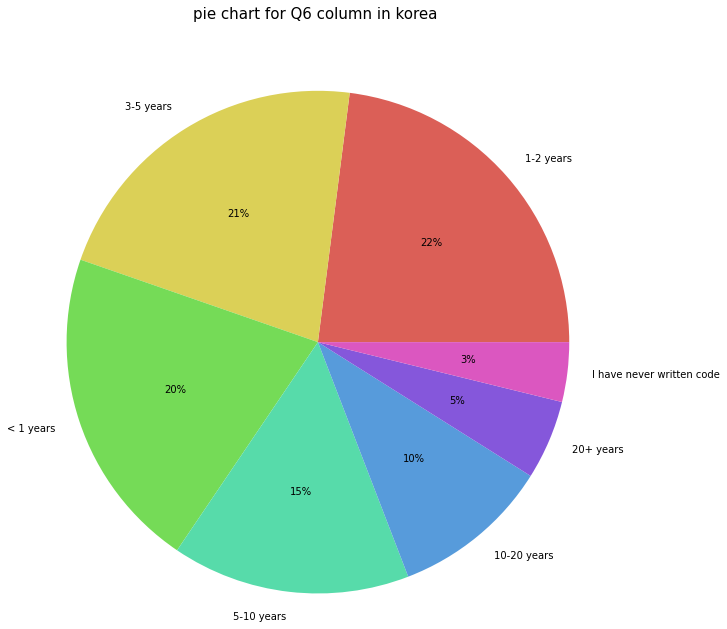

In [88]:
plt.figure(figsize=(10,10))
plt.pie(kQ6.value_counts(),
        labels=kQ6.value_counts().index,
        autopct='%d%%',
          colors=sns.color_palette('hls',len(kQ6.value_counts().index)),
      
        textprops={'fontsize':10})

plt.axis('equal')

plt.title("pie chart for Q6 column in korea",fontsize=15,pad=50)

plt.show()

In [89]:
kQ15 = korea["Q15"]
kQ15.value_counts()

Under 1 year                             73
1-2 years                                42
2-3 years                                25
3-4 years                                25
5-10 years                               11
4-5 years                                 9
I do not use machine learning methods     9
Name: Q15, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

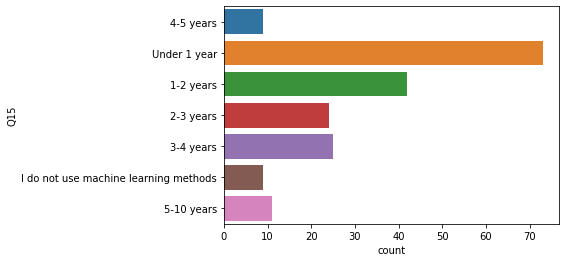

In [90]:
sns.countplot(y="Q15",data=korea[1:])
plt.show

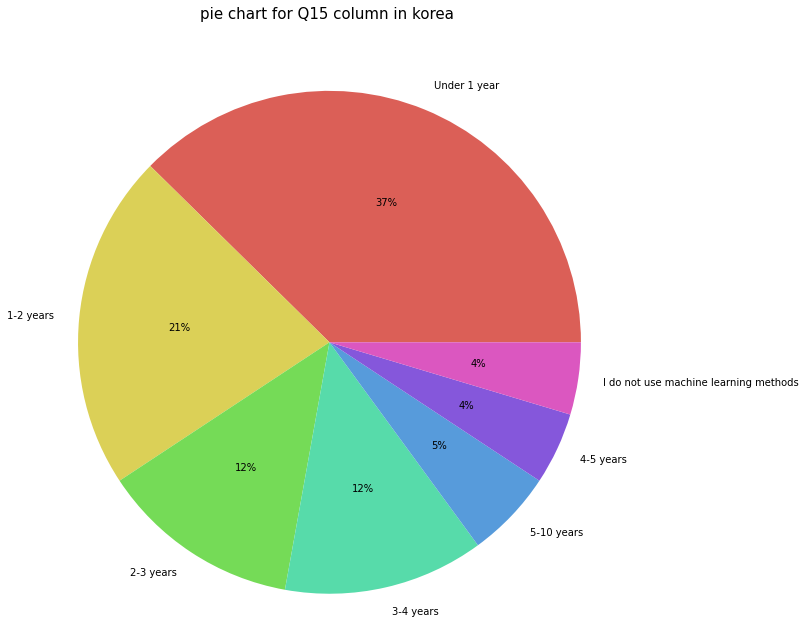

In [91]:
plt.figure(figsize=(10,10))
plt.pie(kQ15.value_counts(),
        labels=kQ15.value_counts().index,
        autopct='%d%%',
          colors=sns.color_palette('hls',len(kQ15.value_counts().index)),
      
        textprops={'fontsize':10})

plt.axis('equal')

plt.title("pie chart for Q15 column in korea",fontsize=15,pad=50)

plt.show()

In [92]:
kQ5 = korea["Q5"]
kQ5.value_counts()

Student                      66
Machine Learning Engineer    30
Research Scientist           26
Software Engineer            22
Data Scientist               19
Currently not employed       18
Other                        16
Data Analyst                 14
Business Analyst             10
Product/Project Manager       9
Data Engineer                 4
Statistician                  3
DBA/Database Engineer         2
Name: Q5, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

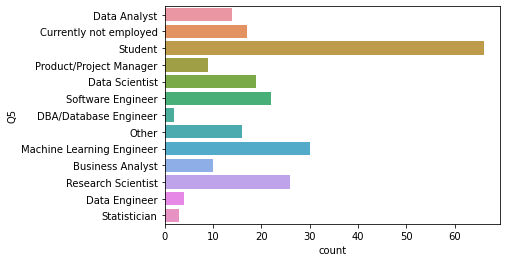

In [93]:
sns.countplot(y="Q5",data=korea[1:])
plt.show

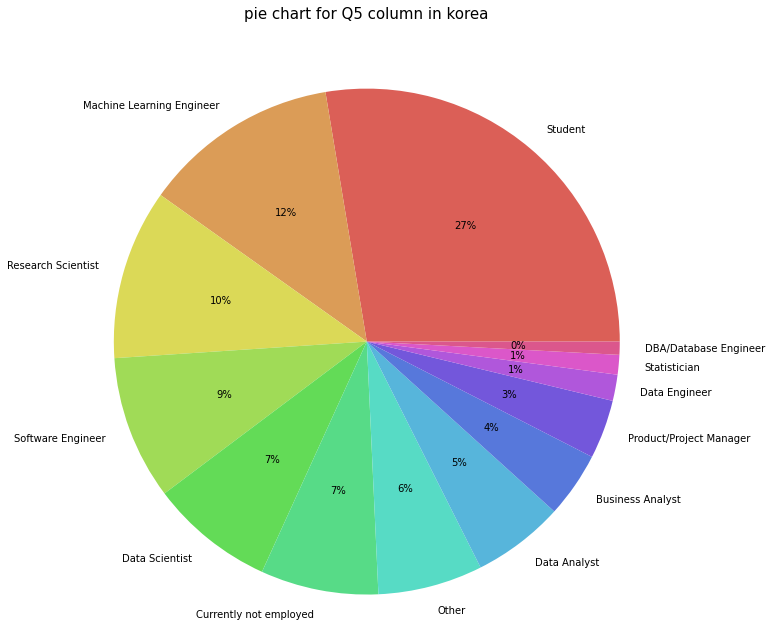

In [94]:
plt.figure(figsize=(10,10))
plt.pie(kQ5.value_counts(),
        labels=kQ5.value_counts().index,
        autopct='%d%%',
          colors=sns.color_palette('hls',len(kQ5.value_counts().index)),
      
        textprops={'fontsize':10})

plt.axis('equal')

plt.title("pie chart for Q5 column in korea",fontsize=15,pad=50)

plt.show()

In [95]:
kQ20 = korea["Q20"]
kQ20.value_counts()

0-49 employees              61
50-249 employees            23
1000-9,999 employees        20
250-999 employees           19
10,000 or more employees    11
Name: Q20, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

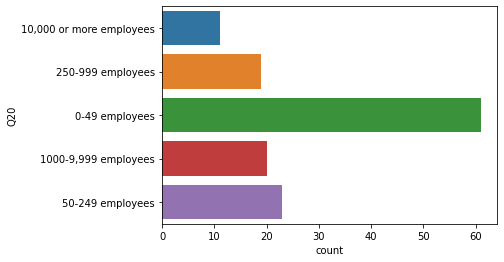

In [96]:
sns.countplot(y="Q20",data=korea[1:])
plt.show

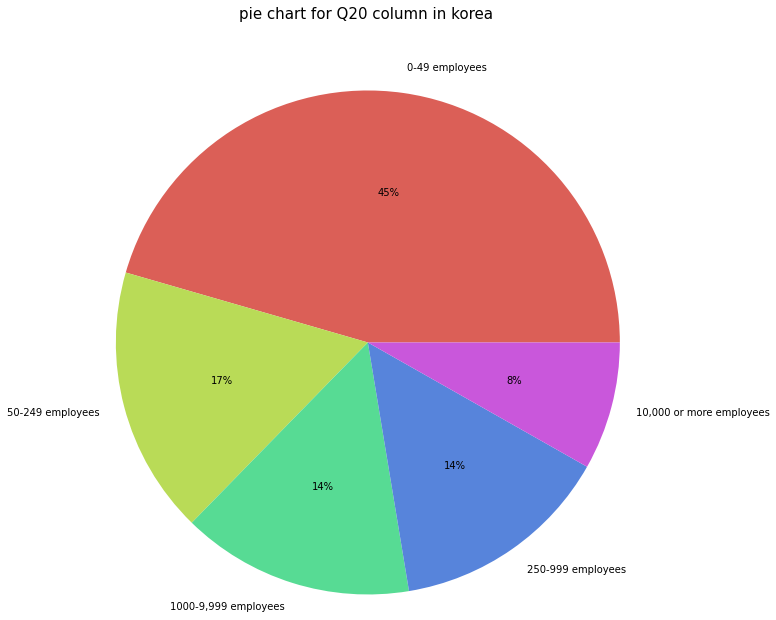

In [97]:
plt.figure(figsize=(10,10))
plt.pie(kQ20.value_counts(),
        labels=kQ20.value_counts().index,
        autopct='%d%%',
          colors=sns.color_palette('hls',len(kQ20.value_counts().index)),
      
        textprops={'fontsize':10})

plt.axis('equal')

plt.title("pie chart for Q20 column in korea",fontsize=15,pad=50)

plt.show()

In [98]:
kQ22 = korea["Q22"]
kQ22.value_counts()

We are exploring ML methods (and may one day put a model into production)                    40
We recently started using ML methods (i.e., models in production for less than 2 years)      32
We use ML methods for generating insights (but do not put working models into production)    22
No (we do not use ML methods)                                                                20
I do not know                                                                                10
We have well established ML methods (i.e., models in production for more than 2 years)        8
Name: Q22, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

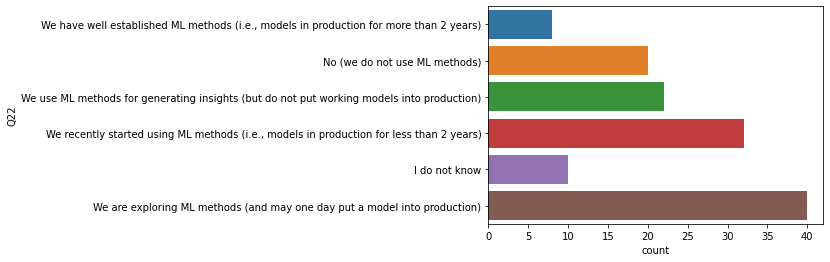

In [99]:
sns.countplot(y="Q22",data=korea[1:])
plt.show

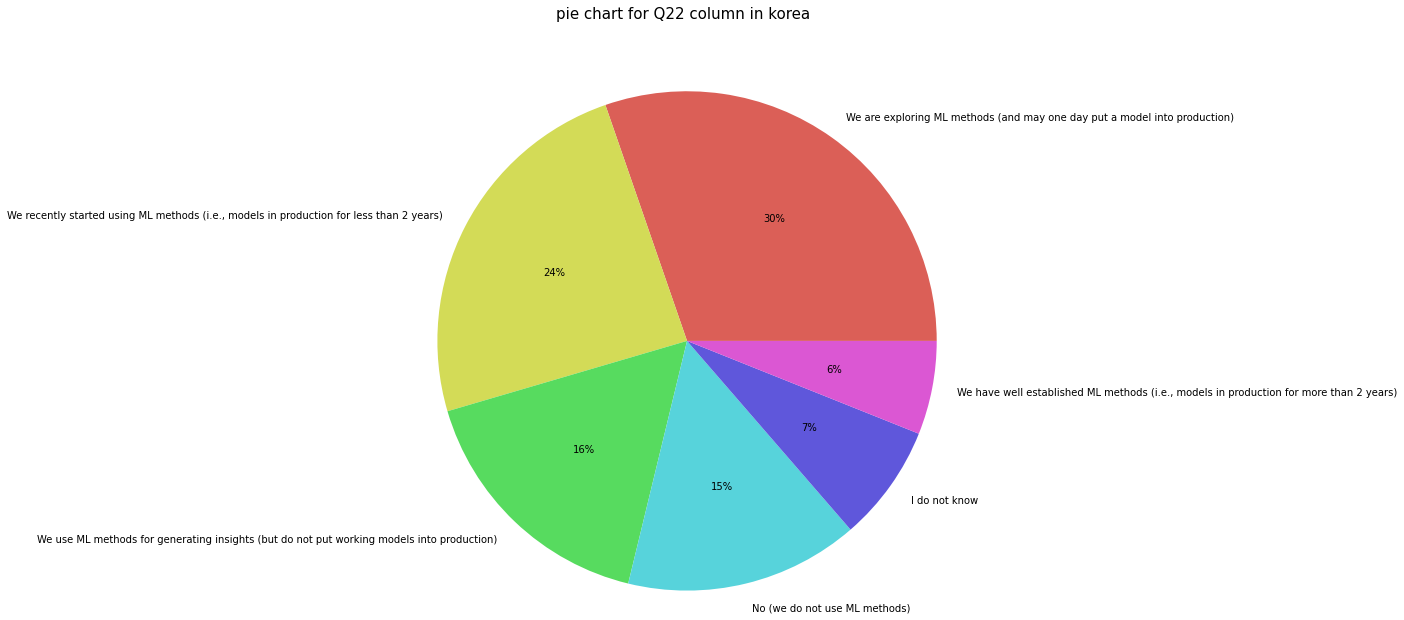

In [100]:
plt.figure(figsize=(10,10))
plt.pie(kQ22.value_counts(),
        labels=kQ22.value_counts().index,
        autopct='%d%%',
          colors=sns.color_palette('hls',len(kQ22.value_counts().index)),
      
        textprops={'fontsize':10})

plt.axis('equal')

plt.title("pie chart for Q22 column in korea",fontsize=15,pad=50)

plt.show()